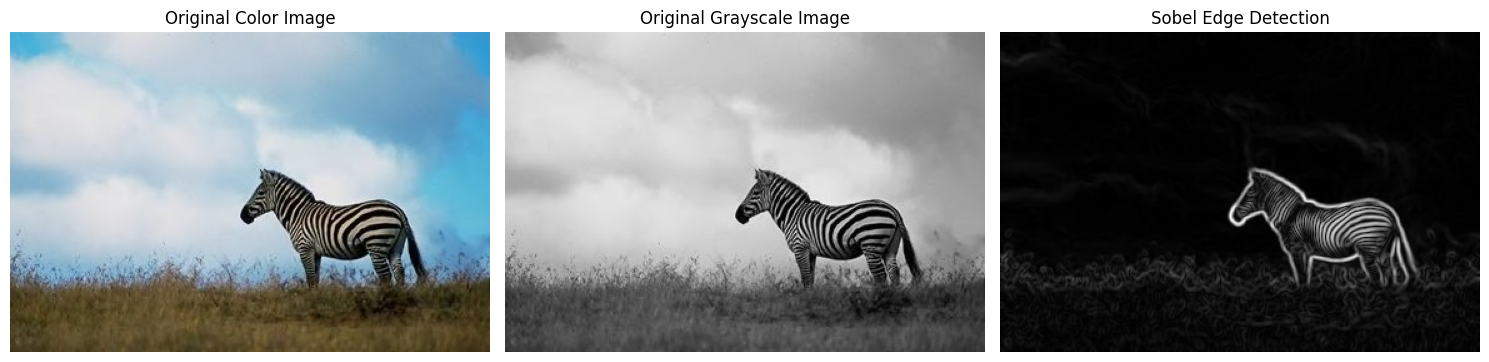

In [1]:
# Sobel
import cv2
import matplotlib.pyplot as plt

# カラー画像を読み込み
img_color = cv2.imread('data/Au_ani_00001.jpg')

# グレースケールで画像読み込み
img_gray = cv2.imread('data/Au_ani_00001.jpg', cv2.IMREAD_GRAYSCALE)

# Sobelフィルタでエッジ検出
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=7)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=7)
sobel = cv2.magnitude(sobel_x, sobel_y)

# エッジ画像を保存（8bitに変換して保存する）
sobel_uint8 = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
cv2.imwrite('Au_ani_00001_sobel.jpg', sobel_uint8)

# 元画像、カラー画像、エッジ画像を並べて表示
plt.figure(figsize=(15,5))

# 元のカラー画像
plt.subplot(1, 3, 1)
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # BGRからRGBに変換
plt.imshow(img_color_rgb)
plt.title('Original Color Image')
plt.axis('off')

# グレースケール画像
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Sobelエッジ画像
plt.subplot(1, 3, 3)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

Saved: results/sobel_row1.png


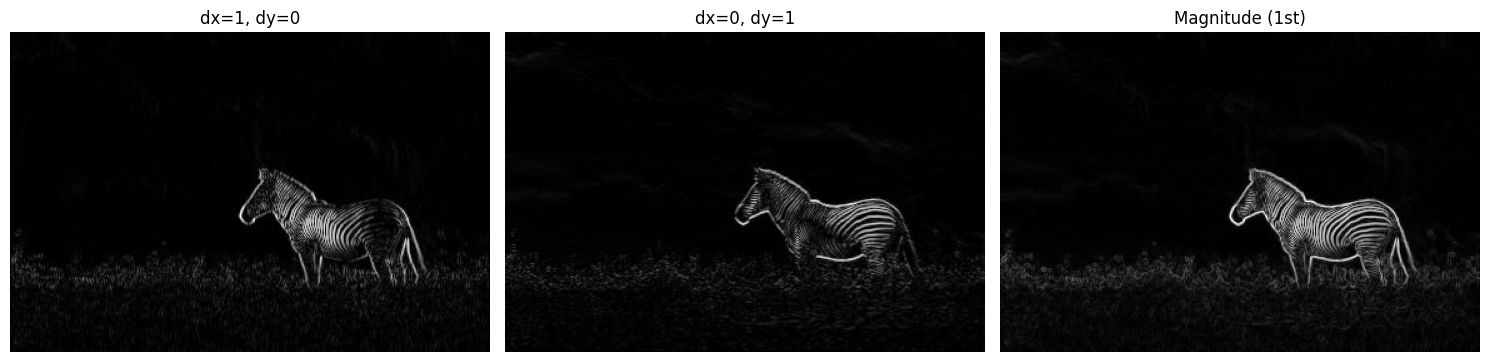

Saved: results/sobel_row2.png


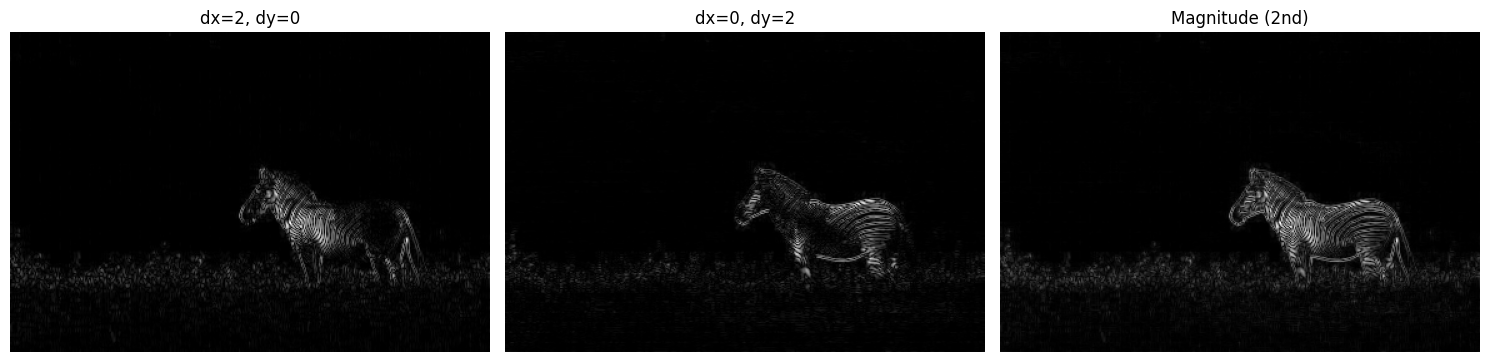

Saved: results/sobel_row3.png


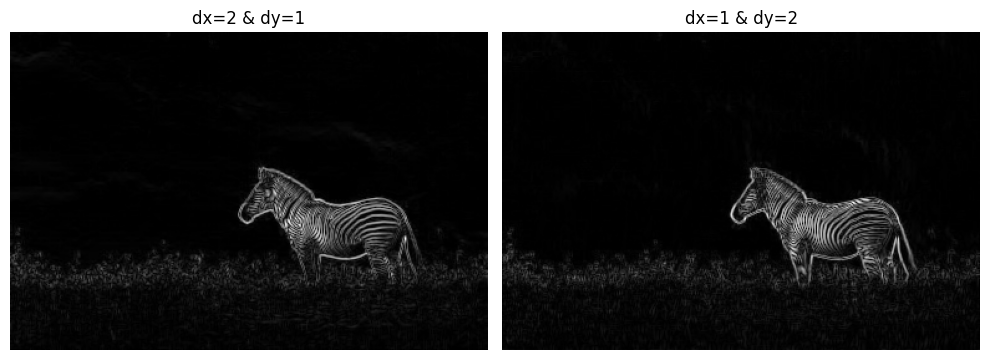

In [4]:

#微分方向

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ————————————————————————————————
# 設定
IMG_PATH   = 'data/Au_ani_00001.jpg'   # 画像のパス（必要に応じて修正）
OUTPUT_DIR = 'results'                 # 結果出力フォルダ
KSIZE      = 3                         # Sobel カーネルサイズ（共通）
# ————————————————————————————————

os.makedirs(OUTPUT_DIR, exist_ok=True)

# グレースケール画像読み込み
img_gray = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(f"画像が見つかりません: {IMG_PATH}")

# 正規化関数（絶対値→0–255 uint8）
def norm_uint8(x):
    return cv2.normalize(np.abs(x), None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# ————————————————————————————————
# 1行目：一次微分（X方向／Y方向／両方）
# ————————————————————————————————
sx1 = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=KSIZE)
sy1 = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=KSIZE)
mag1 = np.hypot(sx1, sy1)

imgs1  = [norm_uint8(sx1), norm_uint8(sy1), norm_uint8(mag1)]
titles1 = ['dx=1, dy=0', 'dx=0, dy=1', 'Magnitude (1st)']

plt.figure(figsize=(15,5))
for i, (im, t) in enumerate(zip(imgs1, titles1), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(im, cmap='gray')
    plt.title(t)
    plt.axis('off')

plt.tight_layout()
out1 = os.path.join(OUTPUT_DIR, 'sobel_row1.png')
plt.savefig(out1, dpi=150)
print(f"Saved: {out1}")
plt.show()


# ————————————————————————————————
# 2行目：二次微分（X方向／Y方向／両方）
# ————————————————————————————————
sx2 = cv2.Sobel(img_gray, cv2.CV_64F, 2, 0, ksize=KSIZE)
sy2 = cv2.Sobel(img_gray, cv2.CV_64F, 0, 2, ksize=KSIZE)
mag2 = np.hypot(sx2, sy2)

imgs2  = [norm_uint8(sx2), norm_uint8(sy2), norm_uint8(mag2)]
titles2 = ['dx=2, dy=0', 'dx=0, dy=2', 'Magnitude (2nd)']

plt.figure(figsize=(15,5))
for i, (im, t) in enumerate(zip(imgs2, titles2), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(im, cmap='gray')
    plt.title(t)
    plt.axis('off')

plt.tight_layout()
out2 = os.path.join(OUTPUT_DIR, 'sobel_row2.png')
plt.savefig(out2, dpi=150)
print(f"Saved: {out2}")
plt.show()


# ————————————————————————————————
# 3行目：組み合わせ比較
#   A: X方向2次 & Y方向1次
#   B: X方向1次 & Y方向2次
# ————————————————————————————————
comb_a = np.hypot(sx2, sy1)
comb_b = np.hypot(sx1, sy2)

imgs3  = [norm_uint8(comb_a), norm_uint8(comb_b)]
titles3 = ['dx=2 & dy=1', 'dx=1 & dy=2']

plt.figure(figsize=(10,5))
for i, (im, t) in enumerate(zip(imgs3, titles3), start=1):
    plt.subplot(1, 2, i)
    plt.imshow(im, cmap='gray')
    plt.title(t)
    plt.axis('off')

plt.tight_layout()
out3 = os.path.join(OUTPUT_DIR, 'sobel_row3.png')
plt.savefig(out3, dpi=150)
print(f"Saved: {out3}")
plt.show()


Saved: results/sobel_magnitude_ksize.png


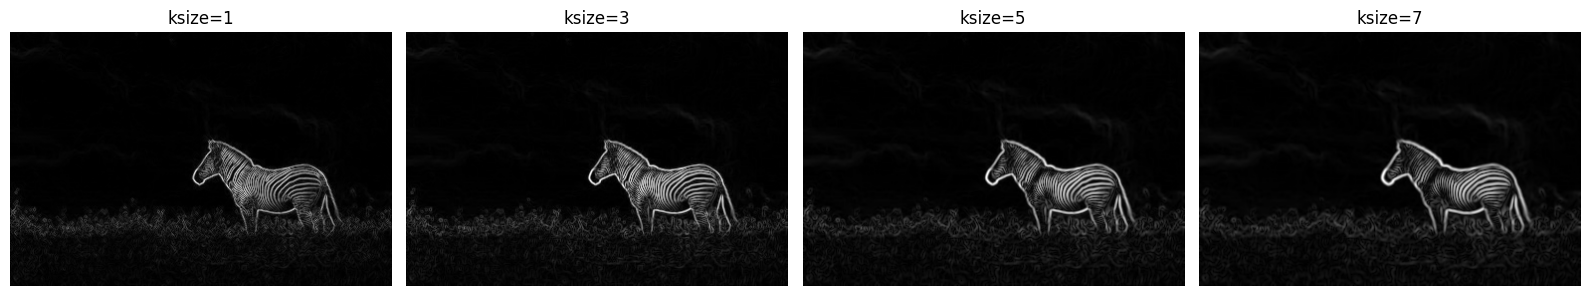

In [6]:
#ksize比較

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ————————————————————————————————
# 設定
IMG_PATH   = 'data/Au_ani_00001.jpg'   # 入力画像パス
OUTPUT_DIR = 'results'                 # 出力フォルダ
KSIZES     = [1, 3, 5, 7]              # 比較するカーネルサイズ
# ————————————————————————————————

os.makedirs(OUTPUT_DIR, exist_ok=True)

# グレースケールで読み込み
img_gray = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(f"画像が見つかりません: {IMG_PATH}")

# 正規化関数（絶対値→0–255 uint8）
def norm_uint8(x):
    return cv2.normalize(np.abs(x), None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# 比較表示（1行×len(KSIZES)列）
plt.figure(figsize=(4 * len(KSIZES), 4))
for i, k in enumerate(KSIZES, start=1):
    # X,Y 微分
    sx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=k)
    sy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=k)
    # マグニチュード計算
    mag = np.hypot(sx, sy)
    mag_u = norm_uint8(mag)

    plt.subplot(1, len(KSIZES), i)
    plt.imshow(mag_u, cmap='gray')
    plt.title(f'ksize={k}')
    plt.axis('off')

plt.tight_layout()
out_path = os.path.join(OUTPUT_DIR, 'sobel_magnitude_ksize.png')
plt.savefig(out_path, dpi=150)
print(f"Saved: {out_path}")
plt.show()


Saved: results/scharr_row1.png


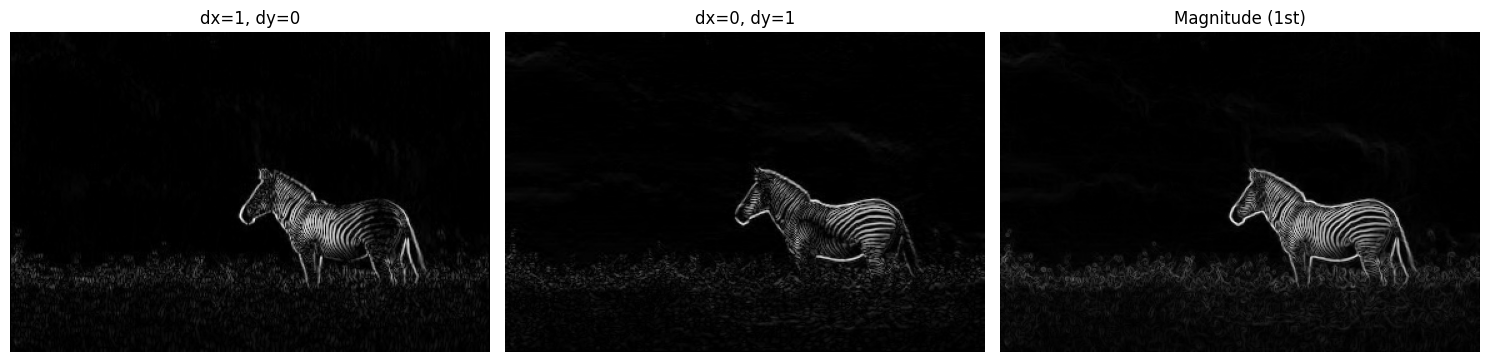

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/deriv.cpp:67: error: (-215:Assertion failed) dx >= 0 && dy >= 0 && dx+dy == 1 in function 'getScharrKernels'


In [7]:
# Scharr微分方向

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ————————————————————————————————
# 設定
IMG_PATH   = 'data/Au_ani_00001.jpg'   # 入力画像パス
OUTPUT_DIR = 'results'                 # 出力フォルダ
# ————————————————————————————————

os.makedirs(OUTPUT_DIR, exist_ok=True)

# グレースケール画像読み込み
img_gray = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(f"画像が見つかりません: {IMG_PATH}")

# 正規化関数（絶対値→0–255 uint8）
def norm_uint8(x):
    return cv2.normalize(np.abs(x), None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# ————————————————————————————————
# 1行目：一次微分（X方向／Y方向／両方）
# ————————————————————————————————
sx1 = cv2.Scharr(img_gray, cv2.CV_64F, 1, 0)
sy1 = cv2.Scharr(img_gray, cv2.CV_64F, 0, 1)
mag1 = np.hypot(sx1, sy1)

imgs1  = [norm_uint8(sx1), norm_uint8(sy1), norm_uint8(mag1)]
titles1 = ['dx=1, dy=0', 'dx=0, dy=1', 'Magnitude (1st)']

plt.figure(figsize=(15,5))
for i, (im, t) in enumerate(zip(imgs1, titles1), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(im, cmap='gray')
    plt.title(t)
    plt.axis('off')

plt.tight_layout()
out1 = os.path.join(OUTPUT_DIR, 'scharr_row1.png')
plt.savefig(out1, dpi=150)
print(f"Saved: {out1}")
plt.show()


# ————————————————————————————————
# 2行目：二次微分（X方向／Y方向／両方）
# ————————————————————————————————
sx2 = cv2.Scharr(img_gray, cv2.CV_64F, 2, 0)
sy2 = cv2.Scharr(img_gray, cv2.CV_64F, 0, 2)
mag2 = np.hypot(sx2, sy2)

imgs2  = [norm_uint8(sx2), norm_uint8(sy2), norm_uint8(mag2)]
titles2 = ['dx=2, dy=0', 'dx=0, dy=2', 'Magnitude (2nd)']

plt.figure(figsize=(15,5))
for i, (im, t) in enumerate(zip(imgs2, titles2), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(im, cmap='gray')
    plt.title(t)
    plt.axis('off')

plt.tight_layout()
out2 = os.path.join(OUTPUT_DIR, 'scharr_row2.png')
plt.savefig(out2, dpi=150)
print(f"Saved: {out2}")
plt.show()


# ————————————————————————————————
# 3行目：組み合わせ比較
#   A: X方向2次 & Y方向1次
#   B: X方向1次 & Y方向2次
# ————————————————————————————————
comb_a = np.hypot(sx2, sy1)
comb_b = np.hypot(sx1, sy2)

imgs3  = [norm_uint8(comb_a), norm_uint8(comb_b)]
titles3 = ['dx=2 & dy=1', 'dx=1 & dy=2']

plt.figure(figsize=(10,5))
for i, (im, t) in enumerate(zip(imgs3, titles3), start=1):
    plt.subplot(1, 2, i)
    plt.imshow(im, cmap='gray')
    plt.title(t)
    plt.axis('off')

plt.tight_layout()
out3 = os.path.join(OUTPUT_DIR, 'scharr_row3.png')
plt.savefig(out3, dpi=150)
print(f"Saved: {out3}")
plt.show()


比較画像を保存しました: results/canny_edges_only_comparison.jpg


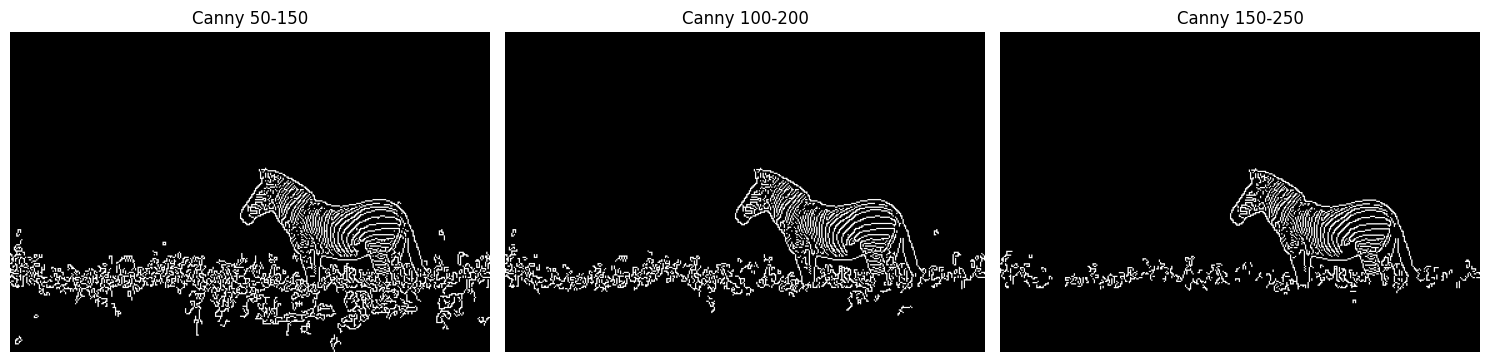

In [9]:
import cv2
import matplotlib.pyplot as plt
import os

# 入力画像パスと保存先フォルダ
img_path = 'data/Au_ani_00001.jpg'
output_dir = 'results'
os.makedirs(output_dir, exist_ok=True)

# グレースケール画像を読み込み
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(f"画像が見つかりません: {img_path}")

# 比較する Canny のしきい値ペア
threshold_pairs = [(50, 150), (100, 200), (150, 250)]

# 図のセットアップ
plt.figure(figsize=(5 * len(threshold_pairs), 5))

# 各しきい値で Canny を実行し表示
for i, (low, high) in enumerate(threshold_pairs):
    canny = cv2.Canny(img_gray, low, high)
    
    # 画像を保存
    outname = f'canny_{low}_{high}.jpg'
    cv2.imwrite(os.path.join(output_dir, outname), canny)
    
    # 図に表示
    plt.subplot(1, len(threshold_pairs), i + 1)
    plt.imshow(canny, cmap='gray')
    plt.title(f'Canny {low}-{high}')
    plt.axis('off')

# 表示＆図保存
plt.tight_layout()
out_img = os.path.join(output_dir, 'canny_edges_only_comparison.jpg')
plt.savefig(out_img, dpi=150)
print(f"比較画像を保存しました: {out_img}")
plt.show()


比較図を保存しました: results/canny_auto_levels_comparison.jpg


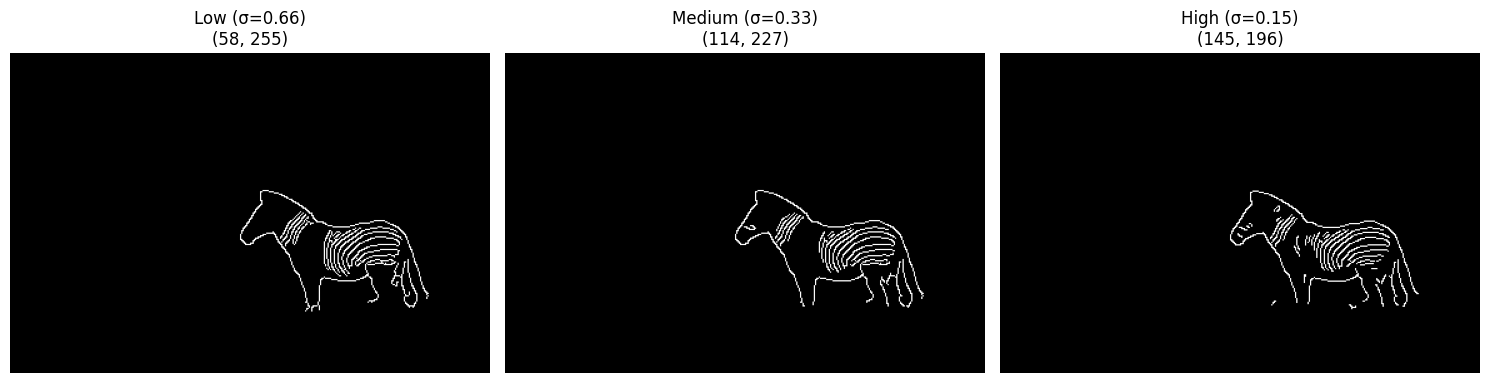

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 入力画像パス
img_path = 'data/Au_ani_00001.jpg'
output_dir = 'results'
os.makedirs(output_dir, exist_ok=True)

# グレースケール画像を読み込み
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(f"画像が見つかりません: {img_path}")

# 前処理（ノイズ抑制）
blur = cv2.GaussianBlur(img_gray, (5, 5), 1.4)

# 画像の中央値を取得
med = np.median(blur)

# σ比率から自動しきい値（Auto Canny）
def auto_thresholds(median, sigma):
    lower = int(max(0, (1.0 - sigma) * median))
    upper = int(min(255, (1.0 + sigma) * median))
    return lower, upper

# 3段階設定（σを変えて調整）
sigma_levels = {
    'Low': 0.66,
    'Medium': 0.33,
    'High': 0.15
}

# 表示用図作成
plt.figure(figsize=(15, 5))
for i, (label, sigma) in enumerate(sigma_levels.items()):
    lower, upper = auto_thresholds(med, sigma)
    canny = cv2.Canny(blur, lower, upper)
    
    # 保存
    out_img = f'canny_auto_{label.lower()}.jpg'
    cv2.imwrite(os.path.join(output_dir, out_img), canny)
    
    # 表示
    plt.subplot(1, 3, i + 1)
    plt.imshow(canny, cmap='gray')
    plt.title(f'{label} (σ={sigma:.2f})\n({lower}, {upper})')
    plt.axis('off')

plt.tight_layout()
out_combined = os.path.join(output_dir, 'canny_auto_levels_comparison.jpg')
plt.savefig(out_combined, dpi=150)
print(f"比較図を保存しました: {out_combined}")
plt.show()
